<a href="https://colab.research.google.com/github/Rohan30/Rohan30/blob/main/ABNB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - AirBNB Bookings Analysis**

**Project Type** - **EDA**

**Contribution** - **Individual**

GitHub Repository Link: https://github.com/Rohan30/Rohan30

#**Problem Statement**

##**Business context**

#***Let's Begin !***

##***1. Know Your Data***

###Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Dataset Loading

In [2]:
#mount the dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
df1=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019 (1).csv')

####Dataset Description

Uploaded the file and created a dataframe out of it, df1.

df1-

###Dataset First View

In [4]:
#head of the dataset
df1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
#tail of the dataset
df1.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

###Dataset Rows & Columns count

In [6]:
#Dataset Rows & Columns 
df1.shape

(48895, 16)

###Dataset Information

In [7]:
#Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

There are no duplicate values in the dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df1.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


There are a lot of missing/null values in the dataset.

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df1.isnull(), cbar=False)

<Axes: >

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 48895 rows and 16 columns. There are mising values but no duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
df1.describe(include='all')

id            name       host_id host_name  \
count   4.889500e+04           48879  4.889500e+04     48874   
unique           NaN           47905           NaN     11452   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       417   
mean    1.901714e+07             NaN  6.762001e+07       NaN   
std     1.098311e+07             NaN  7.861097e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.471945e+06             NaN  7.822033e+06       NaN   
50%     1.967728e+07             NaN  3.079382e+07       NaN   
75%     2.915218e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48895         48895  48895.000000  48895.000000   
unique                   5           221           NaN           NaN   
top              Manhattan  Williamsburg           NaN           NaN   
freq                 21661          3920           NaN           NaN   
mean                   NaN           NaN     40.728949    -73.952170   
std                    NaN           NaN      0.054530      0.046157   
min                    NaN           NaN     40.499790    -74.244420   
25%                    NaN           NaN     40.690100    -73.983070   
50%                    NaN           NaN     40.723070    -73.955680   
75%                    NaN           NaN     40.763115    -73.936275   
max                    NaN           NaN     40.913060    -73.712990   

              room_type         price  minimum_nights  number_of_reviews  \
count             48895  48895.000000    48895.000000       48895.000000   
unique                3           NaN             NaN                NaN   
top     Entire home/apt           NaN             NaN                NaN   
freq              25409           NaN             NaN                NaN   
mean                NaN    152.720687        7.029962          23.274466   
std                 NaN    240.154170       20.510550          44.550582   
min                 NaN      0.000000        1.000000           0.000000   
25%                 NaN     69.000000        1.000000           1.000000   
50%                 NaN    106.000000        3.000000           5.000000   
75%                 NaN    175.000000        5.000000          24.000000   
max                 NaN  10000.000000     1250.000000         629.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843       38843.000000                    48895.000000   
unique        1764                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN           1.373221                        7.143982   
std            NaN           1.680442                       32.952519   
min            NaN           0.010000                        1.000000   
25%            NaN           0.190000                        1.000000   
50%            NaN           0.720000                        1.000000   
75%            NaN           2.020000                        2.000000   
max            NaN          58.500000                      327.000000   

        availability_365  
count       48895.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean          112.781327  
std           131.622289  
min             0.000000  
25%             0.000000  
50%            45.000000  
75%           227.000000  
max           365.000000

### Variables Description 

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


Dealing with Null/Missing Values in the dataset.

In [14]:
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
#removing the null values from the columns name, host_name, reviews_per_month and last_review
df1.dropna(axis=0,subset=['last_review','reviews_per_month','name','host_name'],inplace=True)

In [16]:
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now, the null values have been treated.

In [17]:
#converting last_review into datetime and extracting day,month and year from it.
df1['last_review'] = pd.to_datetime(df1['last_review'], errors='coerce')

df1['Day'], df1['Month'], df1['Year'] = (df1['last_review'].dt.day, df1['last_review'].dt.month, df1['last_review'].dt.year)

In [18]:
#dropping the last_review column as it isn't important
df1.drop('last_review',axis=1,inplace=True)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  reviews_per_month               

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
#name of the listing breakup
df1['name'].value_counts()

Home away from home                        12
Loft Suite @ The Box House Hotel           11
Private Room                               10
Brooklyn Apartment                          9
New york Multi-unit building                8
                                           ..
1BR Avaliable in 3Br Condo                  1
UWS Duplex 3bdrm next to Central Pk         1
Spacious 4bdrm next to CentralPk            1
Luminous room                               1
Cozy Private Room in Bushwick, Brooklyn     1
Name: name, Length: 38253, dtype: int64

In [23]:
#host id breakup
df1['host_id'].value_counts()

219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
            ... 
6389984        1
68684053       1
60077920       1
9997184        1
74162901       1
Name: host_id, Length: 30232, dtype: int64

In [21]:
#host name breakup
df1['host_name'].value_counts()

Michael           335
David             309
John              250
Alex              229
Sonder (NYC)      207
                 ... 
Kriszti√°n           1
Kila                1
Maisha              1
Martin & Hande      1
Rusaa               1
Name: host_name, Length: 9885, dtype: int64

In [22]:
#neighbourhood group breakup
df1['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [24]:
#neighbourhood breakup
df1['neighbourhood'].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [25]:
#room type breakup
df1['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [26]:
#availability 365 breakup
df1['availability_365'].value_counts()

0      12675
365      841
1        367
364      301
5        291
       ...  
214       24
183       23
196       21
181       20
202       19
Name: availability_365, Length: 366, dtype: int64

In [27]:
#neigbourhood groups of top 20 hosts
top_neighbourhoodgroups=df1.groupby(['host_name'])['neighbourhood_group'].value_counts().sort_values(ascending=False)
top_neighbourhoodgroups.head(20)

host_name          neighbourhood_group
Sonder (NYC)       Manhattan              207
Michael            Manhattan              176
David              Manhattan              149
Michael            Brooklyn               127
John               Manhattan              127
David              Brooklyn               115
Alex               Manhattan              110
Mike               Manhattan              108
Sarah              Brooklyn               105
Alex               Brooklyn                99
Melissa            Brooklyn                98
John               Brooklyn                89
Daniel             Manhattan               85
Jessica            Brooklyn                80
Corporate Housing  Manhattan               79
Anna               Manhattan               75
Chris              Manhattan               74
Maria              Manhattan               73
Andrew             Brooklyn                71
Daniel             Brooklyn                69
Name: neighbourhood_group, dtype: int64

In [30]:
# find the average price in every neighbourhood_group with respective to room type
avg_price_of_the_room=df1.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean()
avg_price_of_the_room

neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  120.938312
1                Bronx     Private room   57.093511
2                Bronx      Shared room   56.930233
3             Brooklyn  Entire home/apt  171.281897
4             Brooklyn     Private room   73.349562
5             Brooklyn      Shared room   45.458621
6            Manhattan  Entire home/apt  230.200964
7            Manhattan     Private room  106.607488
8            Manhattan      Shared room   77.980337
9               Queens  Entire home/apt  139.225603
10              Queens     Private room   69.302838
11              Queens      Shared room   64.467105
12       Staten Island  Entire home/apt  125.366667
13       Staten Island     Private room   57.584906
14       Staten Island      Shared room   57.600000

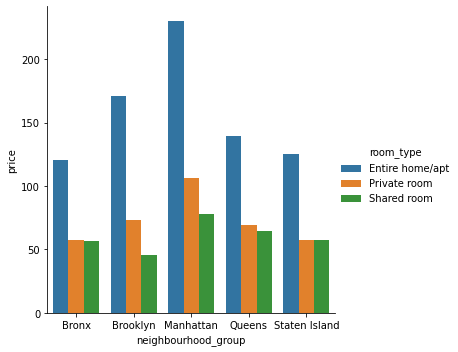

In [31]:
sns.catplot(data=avg_price_of_the_room,x='neighbourhood_group',y='price',hue='room_type',kind='bar')

In [32]:
#Finding the number of hosts in each neighbourhood group 
host_areas=df1.groupby('neighbourhood_group')['host_name'].nunique().sort_values(ascending=False)
host_areas.reset_index(name='number_of_hosts')

neighbourhood_group  number_of_hosts
0            Brooklyn             5290
1           Manhattan             5081
2              Queens             2065
3               Bronx              530
4       Staten Island              189

In [33]:
host_areas.plot(kind='bar',x='neighbourhood_group')
plt.title('Hosts in different Areas',fontsize=15,color='Black')
plt.ylabel('Number of hosts',fontsize=15,color='Black')
plt.xlabel('Neighbourhood Group',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

In [34]:
# Top 10 hosts with most earnings in terms of price
top_10_host=df1.groupby(['host_name','host_id','neighbourhood_group'])['price'].sum().sort_values(ascending=False)[:10]
top_10_host

host_name          host_id    neighbourhood_group
Sonder (NYC)       219517861  Manhattan              55920
Red Awning         205031545  Manhattan              24194
Henry              836168     Manhattan              19500
Jessica            1177497    Brooklyn               14850
Jeremy & Laura     16098958   Manhattan              12080
Corporate Housing  61391963   Manhattan              11425
Kara               30283594   Manhattan              10466
Kathrine           20582832   Queens                 10000
Erin               5143901    Brooklyn               10000
Olson              1235070    Manhattan               9999
Name: price, dtype: int64

In [35]:
top_10_host.plot(x='host_name',y='price',kind='bar')
plt.title('Hosts with most earnings',fontsize=15,color='Black')
plt.ylabel('price',fontsize=15,color='Black')
plt.xlabel('host details',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

* Here we have tried to find the top 10 most profitable hosts of all.
* This survey will help the company to do the behavioural analysis on customer preference while chosing the host. It will allow the company to adept the practices followed by these top 10 host and will apply the same on other host who are not so profitable.


In [36]:
# Most Expensive hosts with least availability
df1.loc[df1['availability_365']==0].sort_values(by='price',ascending =False).groupby(by='neighbourhood_group').head(1)[['name','host_id',	'host_name',	'neighbourhood_group','room_type',	'price']]

name   host_id host_name  \
9151               Furnished room in Astoria apartment  20582832  Kathrine   
17692  Luxury 1 bedroom apt. -stunning Manhattan views   5143901      Erin   
6530                                Spanish Harlem Apt   1235070     Olson   
10722               large house with inground pool/spa  43524236     Miran   
23519                          Chic Clason Point Condo  17122534      Eliu   

      neighbourhood_group        room_type  price  
9151               Queens     Private room  10000  
17692            Brooklyn  Entire home/apt  10000  
6530            Manhattan  Entire home/apt   9999  
10722       Staten Island  Entire home/apt    429  
23519               Bronx  Entire home/apt    350

* In this Survey we have tried to find the most expensive as well as busiest host of all
* Erin from brooklyn comes out to be the winner here. She has luxurious one bedroom apartment with stunning Manhatten views. She is the most busiest host of all due to which the rent is on higher side (Demand-Supply Concept).

In [37]:
# Least Expensive hosts with most availability
df1.loc[df1['availability_365']==365].sort_values(by='price',ascending =True).groupby(by='neighbourhood_group').head(1)[['name','host_id',	'host_name',	'neighbourhood_group','room_type',	'price']]

name    host_id host_name  \
21196  !!!Co-Housing taken to the Next Level /Flatbush/2    2092314  Valentin   
29979                            Affordable & Convenient   43352661   Charles   
23773                    Best CoLiving next to Bushwick!  134293540  Valentin   
45399                                 Mott Haven Dorm DD   30509656      Orit   
33274                                        Cozy Stay!!  197516314     Genny   

      neighbourhood_group     room_type  price  
21196            Brooklyn   Shared room     20  
29979           Manhattan   Shared room     25  
23773              Queens   Shared room     26  
45399               Bronx   Shared room     28  
33274       Staten Island  Private room     50

In [38]:
#most reviewed hosts
hosts_reviewed=df1.groupby('host_name')['reviews_per_month'].sum().sort_values(ascending=False)[:10].reset_index(name='total_reviews_per_month')
hosts_reviewed

host_name  total_reviews_per_month
0         David                   508.61
1       Michael                   475.82
2          Alex                   443.44
3  Sonder (NYC)                   397.56
4          John                   321.02
5         Maria                   288.39
6          Anna                   229.54
7        Andrew                   199.35
8         Jason                   196.15
9           Sam                   190.27

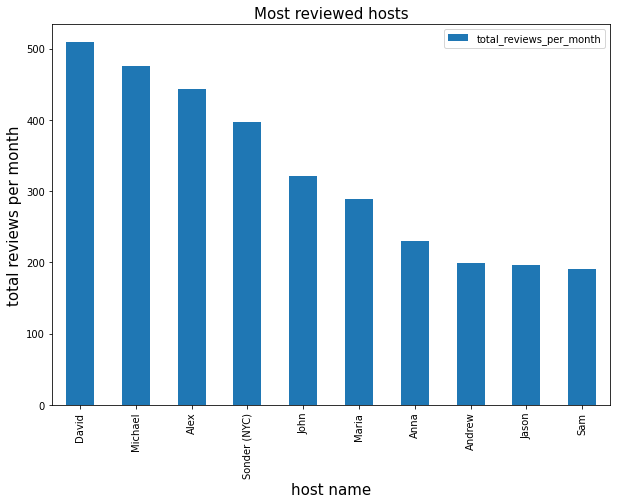

In [39]:
hosts_reviewed.plot(kind='bar',x='host_name',y='total_reviews_per_month')
plt.title('Most reviewed hosts',fontsize=15,color='Black')
plt.ylabel('total reviews per month',fontsize=15,color='Black')
plt.xlabel('host name',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

In [40]:
plt.figure(figsize = (10,7))
hosts_reviewed_df=sns.barplot(x='host_name',y='total_reviews_per_month',data=hosts_reviewed)
hosts_reviewed_df.set_title('Most Reviewed Hosts',fontsize=15,color='Black')
hosts_reviewed_df.set_ylabel('Total Reviews',fontsize=15,color='Black')
hosts_reviewed_df.set_xlabel('Host name',fontsize=15,color='Black')
plt.show()

In [71]:
# finding busiest hosts 
busiest_hosts= df1.groupby(['host_name'])['minimum_nights'].count().reset_index()

busy_host= busiest_hosts.sort_values('minimum_nights', ascending=False).head(10)
busy_host

host_name  minimum_nights
6168       Michael             335
2040         David             309
4303          John             250
258           Alex             229
8470  Sonder (NYC)             207
7974         Sarah             179
5778         Maria             174
1958        Daniel             170
4171       Jessica             170
601           Anna             159

Text(0.5, 1.0, 'Top 10 busiest hosts')

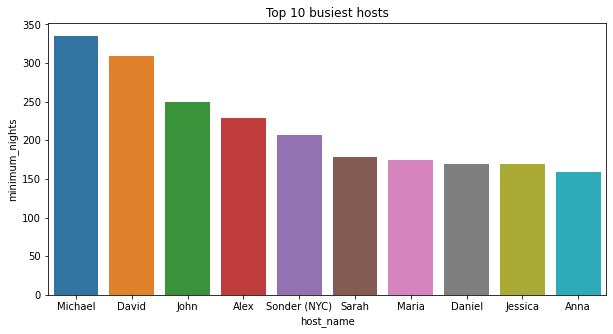

In [79]:
# plotting top 10 busiest hosts
plt.figure(figsize=(10,5))

sns.barplot(x=busy_host['host_name'],y=busy_host['minimum_nights'] )
plt.title('Top 10 busiest hosts')

In [68]:
#most expensive neighbourhoods 
most_expensive_neighbourhoods= df1.groupby(['neighbourhood','neighbourhood_group','availability_365'])['price'].sum().reset_index()

most_expensive_neighbourhoods= most_expensive_neighbourhoods.sort_values('price', ascending=False).head(10)
most_expensive_neighbourhoods

neighbourhood neighbourhood_group  availability_365   price
12365        Williamsburg            Brooklyn                 0  166880
3978         East Village           Manhattan                 0  105960
11492     Upper West Side           Manhattan                 0   94861
517    Bedford-Stuyvesant            Brooklyn                 0   84874
11189     Upper East Side           Manhattan                 0   73349
6096               Harlem           Manhattan                 0   67831
1808              Chelsea           Manhattan                 0   59730
8131              Midtown           Manhattan                 0   56881
6447       Hell's Kitchen           Manhattan                 0   56675
12118        West Village           Manhattan                 0   55835

In [74]:
# plotting top 10 most expensive neighbourhoods
plt.figure(figsize=(18,10))

sns.barplot(x=most_expensive_neighbourhoods['neighbourhood'],y=most_expensive_neighbourhoods['price'] )
plt.title('Top 10 Most expensive neighbourhoods')

Text(0.5, 1.0, 'Top 10 Most expensive neighbourhoods')

In [75]:
#least expensive neighbourhoods 
least_expensive_neighbourhoods= df1.groupby(['neighbourhood','neighbourhood_group','availability_365'])['price'].sum().reset_index()

least_expensive_neighbourhoods= least_expensive_neighbourhoods.sort_values('price', ascending=True).head(10)
least_expensive_neighbourhoods

neighbourhood neighbourhood_group  availability_365  price
3841   East Morrisania               Bronx               127      0
7120           Jamaica              Queens               252     10
7142           Jamaica              Queens               332     10
9606     Randall Manor       Staten Island                 8     13
4391          Elmhurst              Queens               271     15
7093           Jamaica              Queens               138     19
5695      Graniteville       Staten Island               226     20
10288      South Beach       Staten Island                 0     20
5417     Fort Hamilton            Brooklyn               353     20
1028      Borough Park            Brooklyn                14     20

Text(0.5, 1.0, 'Top 10 Least expensive neighbourhoods')

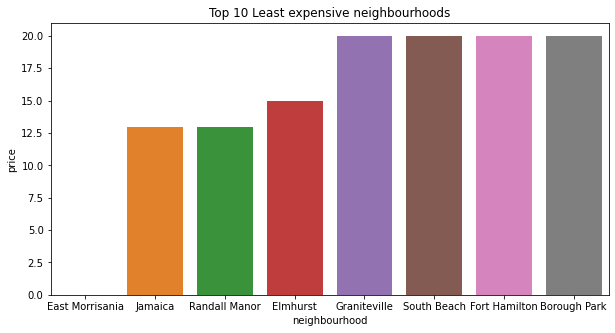

In [78]:
# plotting top 10 least expensive neighbourhoods
plt.figure(figsize=(10,5))

sns.barplot(x=least_expensive_neighbourhoods['neighbourhood'],y=least_expensive_neighbourhoods['price'],ci=None )
plt.title('Top 10 Least expensive neighbourhoods')

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie chart of room_type (Univariate)

<Axes: ylabel='breakup of room type'>

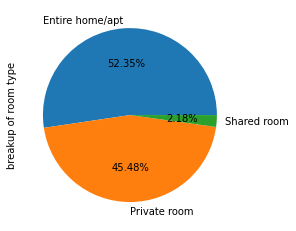

In [32]:
df1.groupby('room_type').size().plot(kind='pie', autopct='%.2f%%',ylabel='breakup of room type')

##### 1. Why did you pick the specific chart?

A pie chart is easy to interpret a data when it has sub groups or categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it is observed that entire homes/apartments make up the most of the listings whereas the shared rooms make up the least of the listings.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

People would want to prefer living in an entire house or a private room rather than taking up a shared room. The listings are also made in such a fashion because of the above reason.

#### Chart - 2 - Pie chart of neighbourhood_group (Univariate)

In [33]:
plt.figure(figsize=(20,8))
df1.groupby('neighbourhood_group').size().plot(kind='pie', autopct='%.2f%%',ylabel='breakup of neighbourhood groups')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is easy to interpret a data when it has sub groups or categories.

##### 2. What is/are the insight(s) found from the chart?

Of the neighbourhoods, Manhattan makes up the most and Staten Island makes up the least of the listings.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The maximum number of listings are in Manhattan might be because of its proximity to offices, department stores etc. The listings in Staten Island could be interpreted in a similar fashion.

#### Chart - 3- Countplot of room_type with neighbourhood_group (Bivariate)

<Axes: xlabel='room_type', ylabel='count'>

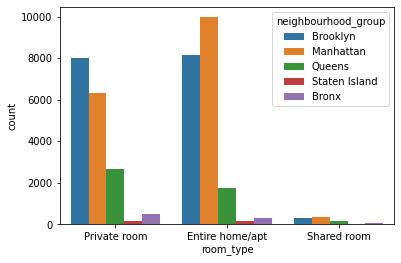

In [64]:
sns.countplot(data=df1,x='room_type',hue='neighbourhood_group')

##### 1. Why did you pick the specific chart?

A bar plot makes it easy to visualise categorical variables having subcategories.

##### 2. What is/are the insight(s) found from the chart?

Of the private rooms that are listed, the maximum is in Brooklyn and the least in Staten Island. For Entire home/apt the maximum is in Manhattan and the least is in Staten Island. Finally for Shared rooms the maximum is in Manhattan and the least is in Staten Island.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4 - Bar Plot of price and room_type with neighbourhood_group(Multivariate)

In [65]:
sns.catplot(data=df1,x='neighbourhood_group',y='price',kind='bar',hue='room_type',ci=None)

##### 1. Why did you pick the specific chart?

A bar plot makes it easy to visualise categorical variables having subcategories.

##### 2. What is/are the insight(s) found from the chart?

For all room categories, the maximum average price is in Manhattan.

For private rooms, the least average price is in Staten Island.

For entire homes/apts, the least average price is in Bronx.

For shared rooms, the least average price is in Brooklyn.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5 - Bar Plot of number_of_reviews and room_type with neighbourhood_group(Multivariate)

In [61]:
sns.catplot(data=df1,x='room_type',y='number_of_reviews',kind='bar',hue='neighbourhood_group',ci=None)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6- Bar Plot of minimum_nights and room_type with neighbourhood_group(Multivariate)

In [60]:
sns.catplot(data=df1,x='room_type',y='minimum_nights',kind='bar',hue='neighbourhood_group',ci=None)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 7 - Bar Plot of most popular hosts (Univariate)

<Axes: >

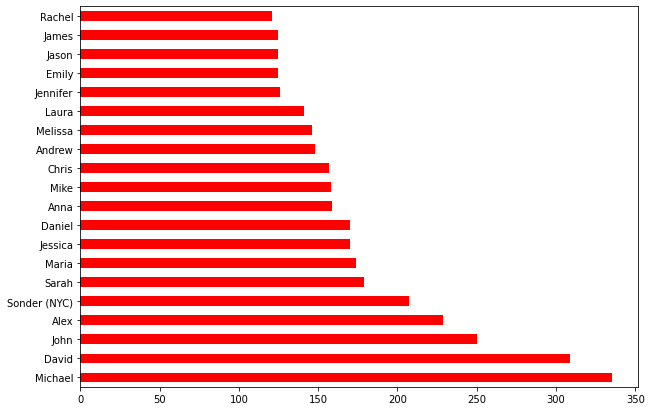

In [118]:
df1['host_name'].value_counts()[:20].plot(kind='barh',color='red')
    

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8 - Bar Plot of most popular listings (Univariate)

In [39]:
df1['name'].value_counts()[:20].plot(kind='barh')

<Axes: >

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9 - Bar Plot of most popular neighbourhoods (Univariate)

<Axes: >

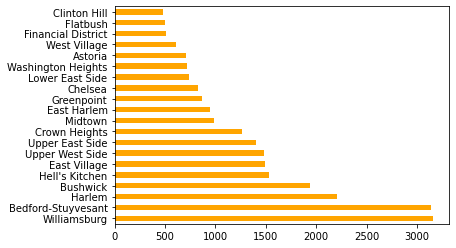

In [40]:
df1['neighbourhood'].value_counts()[:20].plot(kind='barh',color='orange')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 10 - Plot of latitude and longitude with neighbourhood_group(Bivariate)

In [41]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df1.latitude,x=df1.longitude,hue=df1.neighbourhood_group,palette="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 11 - Plot of latitude and longitude with availability_365(Multivariate)

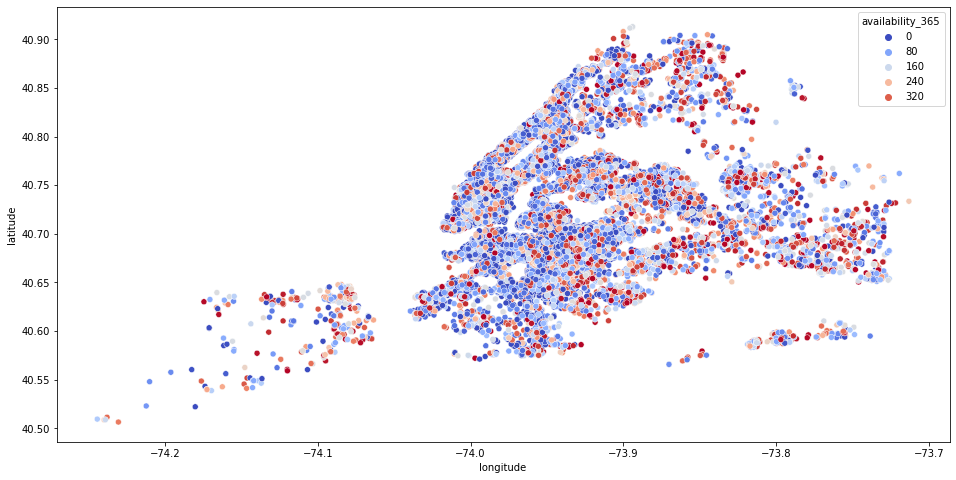

In [42]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df1.latitude,x=df1.longitude,hue=df1.availability_365,palette='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 12 - Line Plot of price and number_of_reviews of Neighbourhood groups(Multivariate)

In [59]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.lineplot(data=df1[df1['neighbourhood_group']=='Bronx'], x='number_of_reviews', y='price', ax=axs[0], color='red',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Brooklyn'], x='number_of_reviews', y='price', ax=axs[1], color='blue',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Manhattan'], x='number_of_reviews', y='price', ax=axs[2], color='black',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Queens'], x='number_of_reviews', y='price', ax=axs[3], color='green',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Staten Island'], x='number_of_reviews', y='price', ax=axs[4], color='purple',ci=None)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='number_of_reviews', ylabel='price')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 13 - Line Plot of price and Month of neighbourhood_group(Multivariate)

In [58]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.lineplot(data=df1[df1['neighbourhood_group']=='Bronx'], x='Month', y='price', ax=axs[0], color='red',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Brooklyn'], x='Month', y='price', ax=axs[1], color='blue',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Manhattan'], x='Month', y='price', ax=axs[2], color='black',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Queens'], x='Month', y='price', ax=axs[3], color='green',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Staten Island'], x='Month', y='price', ax=axs[4], color='purple',ci=None)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='Month', ylabel='price')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 - Line Plot of price and minimum_nights of neighbourhood_groups (Multivariate)

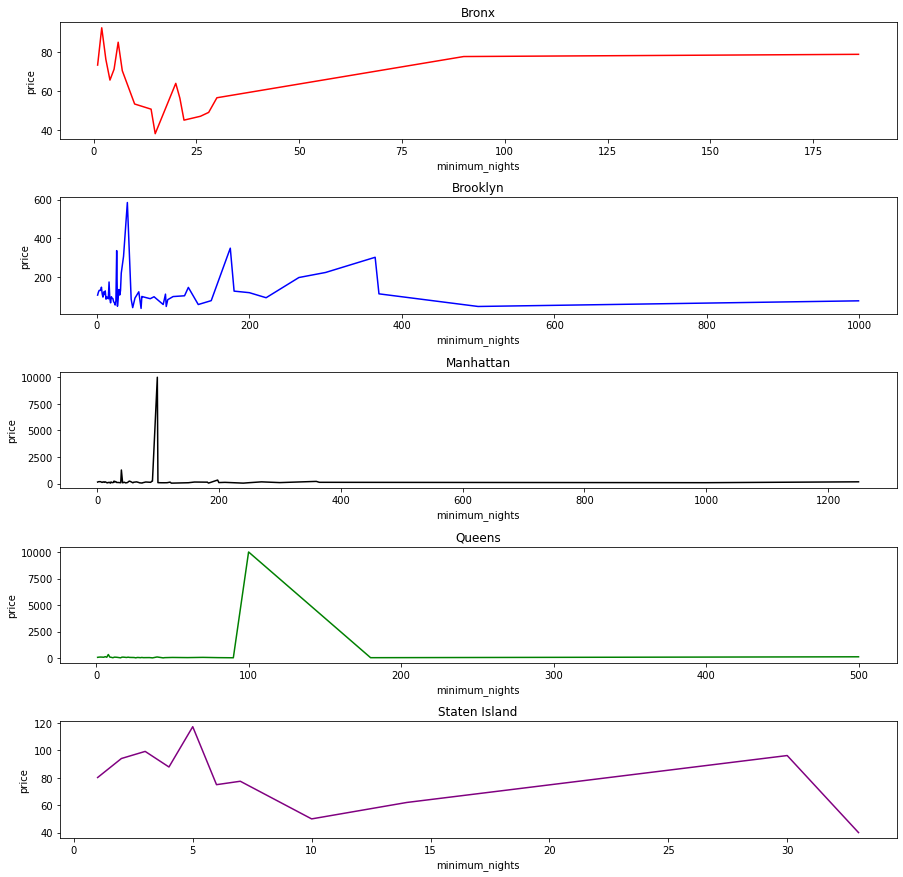

In [57]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.lineplot(data=df1[df1['neighbourhood_group']=='Bronx'], x='minimum_nights', y='price', ax=axs[0], color='red',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Brooklyn'], x='minimum_nights', y='price', ax=axs[1], color='blue',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Manhattan'], x='minimum_nights', y='price', ax=axs[2], color='black',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Queens'], x='minimum_nights', y='price', ax=axs[3], color='green',ci=None)
sns.lineplot(data=df1[df1['neighbourhood_group']=='Staten Island'], x='minimum_nights', y='price', ax=axs[4], color='purple',ci=None)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='minimum_nights', ylabel='price')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 15 - Line Plot of price and number_of_reviews of Bronx(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 16 - Line Plot of price and number_of_reviews of Staten Island(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 17 - LinePlot of price and minimum_nights of neighbourhood_group(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 18 - Line Plot of price and minimum_nights of Bronx(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 19 - Line Plot of price and minimum_nights of Brooklyn(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 20 - Line Plot of price and minimum_nights of Queens(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 21 - Line Plot of price and minimum_nights of Manhattan(Multivariate)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

## **5. Solution to Business Objective**

# **Conclusion**